<a href="https://colab.research.google.com/github/JITHINJITH/AI-LAB/blob/master/accuracy_precision_recall_etc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVM
accuracy_1= [0.97058824 0.87878788 0.93939394]
precision_1= 0.9215686274509803
recall_1= 0.94
confusion matrix [[47  3]
 [ 4 46]]
SGD
accuracy_2= [0.58823529 0.87878788 0.72727273]
precision_2= 0.7
recall_2= 0.7
confusion matrix [[35 15]
 [15 35]]
LOGISTIC
accuracy_3= [0.97058824 0.90909091 0.93939394]
precision_3= 0.94
recall_3= 0.94
confusion matrix [[47  3]
 [ 3 47]]


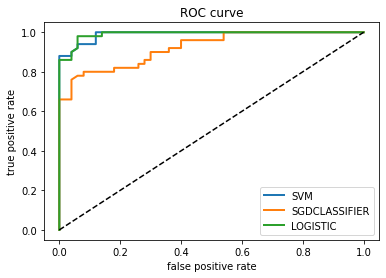

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import * 
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import *
import matplotlib.pyplot as plt
iris=load_iris() 
x=iris.data[50:150,2:]
y=iris.target.reshape(150,1) 
y_new=y[50:150,:] 
y_new=y_new.ravel()


model=Pipeline([('scaler',StandardScaler()),('linearsvm',LinearSVC(C=1,loss='hinge',max_iter=100000))])
accuracy=cross_val_score(model,x,y_new,cv=3,scoring="accuracy") 
y_pred=cross_val_predict(model,x,y_new,cv=3) 
confusionmatrix=confusion_matrix(y_new,y_pred) 
precision=precision_score(y_new,y_pred) 
recall=recall_score(y_new,y_pred) 
y_predscore=cross_val_predict(model,x,y_new,cv=3,method="decision_function")
fpr,tpr,th=roc_curve(y_new,y_predscore,pos_label=2) 
plt.plot(fpr,tpr,linewidth=2,label=None) 
print("SVM")
print("accuracy_1=",accuracy) 
print("precision_1=",precision) 
print("recall_1=",recall) 
print("confusion matrix",confusionmatrix)

model=SGDClassifier()
accuracy=cross_val_score(model,x,y_new,cv=3,scoring="accuracy") 
y_pred=cross_val_predict(model,x,y_new,cv=3) 
confusionmatrix=confusion_matrix(y_new,y_pred) 
precision=precision_score(y_new,y_pred) 
recall=recall_score(y_new,y_pred) 
y_predscore=cross_val_predict(model,x,y_new,cv=3,method="decision_function")
fpr,tpr,th=roc_curve(y_new,y_predscore,pos_label=2)
plt.plot(fpr,tpr,linewidth=2,label=None) 
print("SGD")
print("accuracy_2=",accuracy) 
print("precision_2=",precision) 
print("recall_2=",recall) 
print("confusion matrix",confusionmatrix)

model=LogisticRegression()
accuracy=cross_val_score(model,x,y_new,cv=3,scoring="accuracy")
y_pred=cross_val_predict(model,x,y_new,cv=3) 
confusionmatrix=confusion_matrix(y_new,y_pred) 
precision=precision_score(y_new,y_pred) 
recall=recall_score(y_new,y_pred) 
y_predscore=cross_val_predict(model,x,y_new,cv=3,method="decision_function")
fpr,tpr,th=roc_curve(y_new,y_predscore,pos_label=2) 
plt.plot(fpr,tpr,linewidth=2,label=None) 
plt.plot([0,1],[0,1],'k--')
print("LOGISTIC")
print("accuracy_3=",accuracy) 
print("precision_3=",precision) 
print("recall_3=",recall) 
print("confusion matrix",confusionmatrix)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate") 
plt.title("ROC curve") 
plt.legend(['SVM','SGDCLASSIFIER','LOGISTIC'])
plt.show()
